# 8)  Exploratory data analysis 

Through the exploration and initial analysis of this data, the aim is to gain a basic understanding of the trends and form the basis for the implementation of a predictive model.

In [48]:
#loading libraries
import pandas as pd
import pandas_ta as ta
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
from matplotlib.dates import DateFormatter
import random
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib Inline

In [49]:
#load the dataset
data = pd.read_csv(r"D:\Downloads\merged-csv-files1.csv",error_bad_lines = False)

# Exploring data

In [50]:
#understanding the data
data.shape 

(20326, 10)

In [51]:
data.nunique()

SNo          20326
Name             9
Symbol           9
Date          2991
High         19560
Low          19616
Open         19552
Close        19548
Volume       19638
Marketcap    18621
dtype: int64

In [52]:
data.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,20326.000000,20326.000000,20326.000000,20326.000000,20326.000000,2.032600e+04,2.032600e+04
mean,10163.500000,1074.557501,1009.578583,1043.746210,1045.510322,5.055147e+09,2.534674e+10
std,5867.755122,5083.424717,4754.056415,4931.324697,4936.606422,1.568460e+10,9.388068e+10
min,1.000000,0.001509,0.001091,0.001352,0.001357,0.000000e+00,0.000000e+00
25%,5082.250000,0.222647,0.204617,0.212865,0.213343,2.425870e+06,2.006277e+08
50%,10163.500000,1.797290,1.629473,1.700735,1.712231,1.364441e+08,2.157231e+09
75%,15244.750000,133.896105,124.817358,129.226224,129.315848,2.078718e+09,1.018387e+10
max,20326.000000,64863.098910,62208.964370,63523.754870,63503.457930,3.510000e+11,1.190000e+12


In [53]:
data.head(3)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,29-04-2013 23:59,147.488007,134.000000,134.444,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,30-04-2013 23:59,146.929993,134.050003,144.000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,01-05-2013 23:59,139.889999,107.720001,139.000,116.989998,0.0,1.298955e+09


In [54]:
data.tail(3)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
20323,20324,TRON,TRX,04-07-2021 23:59,0.068182,0.065113,0.066834,0.067298,844766257.1,4.822577e+09
20324,20325,TRON,TRX,05-07-2021 23:59,0.067344,0.063691,0.067330,0.064574,798184866.2,4.627367e+09
20325,20326,TRON,TRX,06-07-2021 23:59,0.066369,0.064010,0.064549,0.064935,699504110.9,4.653234e+09


In [55]:
 print(data['Symbol'].unique())
 print(data['Name'].unique())   

['BTC' 'ETH' 'LTC' 'XMR' 'XRP' 'SOL' 'XLM' 'USDT' 'TRX']
['Bitcoin' 'Ethereum' 'Litecoin' 'Monero' 'Ripple' 'Solana' 'Stellar'
 'Tether' 'TRON']


In [56]:
#counting Nan values
data.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [57]:
#checking the data type
data.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [58]:
#coverting date into datatime
data['Date'] = data['Date'].astype('datetime64[ns]')

In [59]:
#correcting date format
data['Date'] = data['Date'].dt.strftime('%d-%m-%Y')
data.head(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,29-04-2013,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,30-04-2013,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,05-01-2013,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,05-02-2013,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,05-03-2013,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


# Zero values can affect our dataset, So I convert zero into null, after that fill with mean values

In [60]:
data["Open"]=data["Open"].replace(0,np.nan)
data["High"]=data["High"].replace(0,np.nan)
data["Low"]=data["Low"].replace(0,np.nan)
data["Close"]=data["Close"].replace(0,np.nan)
data["Volume"]=data["Volume"].replace(0,np.nan)

In [61]:
data.isnull().sum()

SNo            0
Name           0
Symbol         0
Date           0
High           0
Low            0
Open           0
Close          0
Volume       628
Marketcap      0
dtype: int64

# Volume colume filled with mean

In [62]:
data['Volume'] = data['Volume'].fillna(data.groupby('Symbol')['Volume'].transform('mean'))
data

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,29-04-2013,147.488007,134.000000,134.444000,144.539993,1.186604e+10,1.603769e+09
1,2,Bitcoin,BTC,30-04-2013,146.929993,134.050003,144.000000,139.000000,1.186604e+10,1.542813e+09
2,3,Bitcoin,BTC,05-01-2013,139.889999,107.720001,139.000000,116.989998,1.186604e+10,1.298955e+09
3,4,Bitcoin,BTC,05-02-2013,125.599998,92.281898,116.379997,105.209999,1.186604e+10,1.168517e+09
4,5,Bitcoin,BTC,05-03-2013,108.127998,79.099998,106.250000,97.750000,1.186604e+10,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
20321,20322,TRON,TRX,07-02-2021,0.066593,0.063369,0.064808,0.066512,8.494136e+08,4.766239e+09
20322,20323,TRON,TRX,07-03-2021,0.067337,0.065282,0.066566,0.066813,7.328898e+08,4.787777e+09
20323,20324,TRON,TRX,07-04-2021,0.068182,0.065113,0.066834,0.067298,8.447663e+08,4.822577e+09
20324,20325,TRON,TRX,07-05-2021,0.067344,0.063691,0.067330,0.064574,7.981849e+08,4.627367e+09


In [70]:
data = data.dropna()

# Visualizing data

1) Bar plot

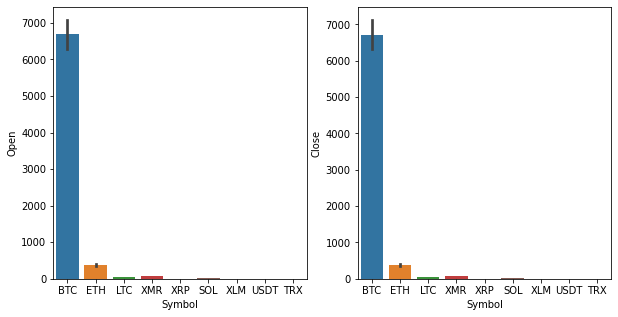

In [71]:
plt.figure(figsize=(10,5))
plt. subplots_adjust()

plt.subplot(1,2,1)
sns.barplot(x="Symbol", y="Open", data=data)

plt.subplot(1,2,2)
sns.barplot(x="Symbol", y="Close", data=data)
plt.show()

3) Scatter plot

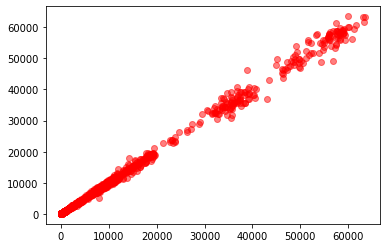

In [72]:
x=data["Open"]
y=data["Close"]
size=(20)
plt.scatter(x,y,color=["r"], alpha=0.5)

In [73]:
corr=data.corr()

In [74]:
corr

,SNo,High,Low,Open,Close,Volume,Marketcap
SNo,1.000000,-0.270262,-0.271736,-0.270703,-0.270873,0.020970,-0.270720
High,-0.270262,1.000000,0.999096,0.999567,0.999546,0.408688,0.969651
Low,-0.271736,0.999096,1.000000,0.999149,0.999449,0.405176,0.969173
Open,-0.270703,0.999567,0.999149,1.000000,0.998951,0.407668,0.968908
Close,-0.270873,0.999546,0.999449,0.998951,1.000000,0.407221,0.969942
Volume,0.020970,0.408688,0.405176,0.407668,0.407221,1.000000,0.469359
Marketcap,-0.270720,0.969651,0.969173,0.968908,0.969942,0.469359,1.000000


<AxesSubplot:>

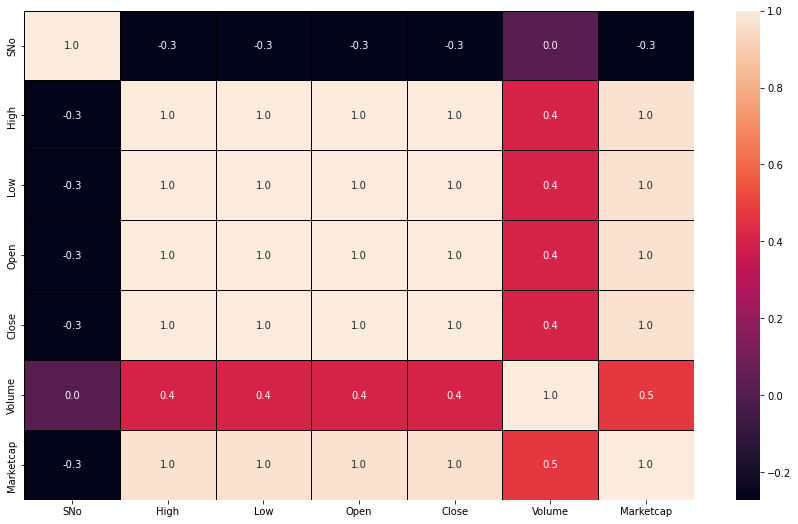

In [75]:
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, linecolor="black", linewidths=1, fmt='.1f')

3) Histogram

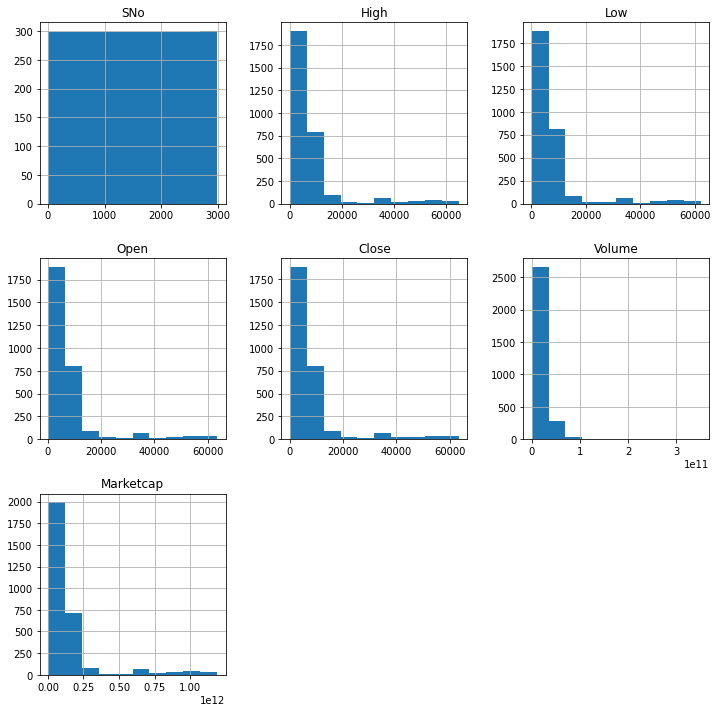

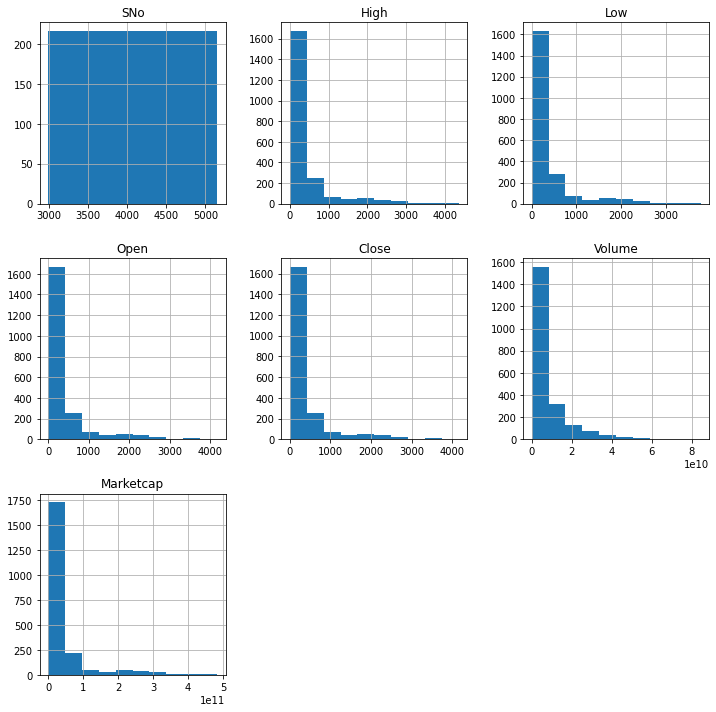

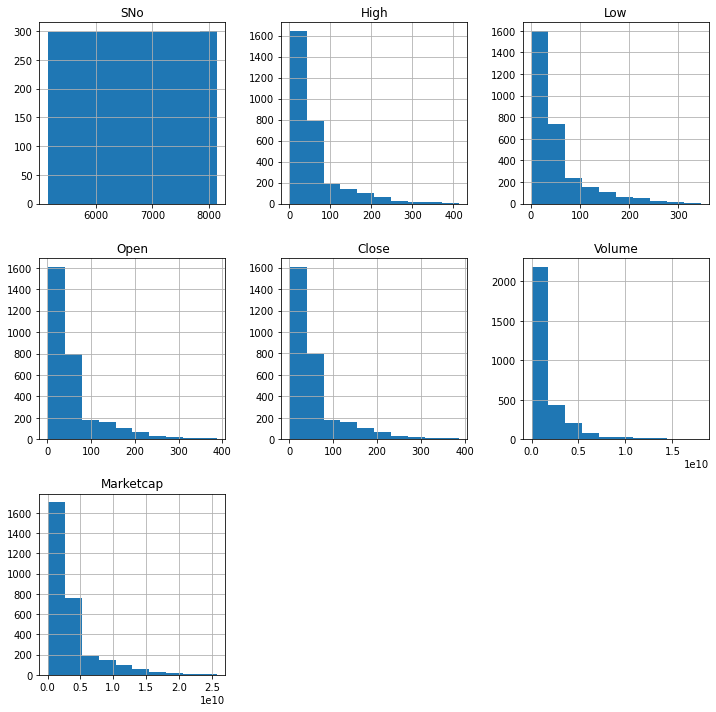

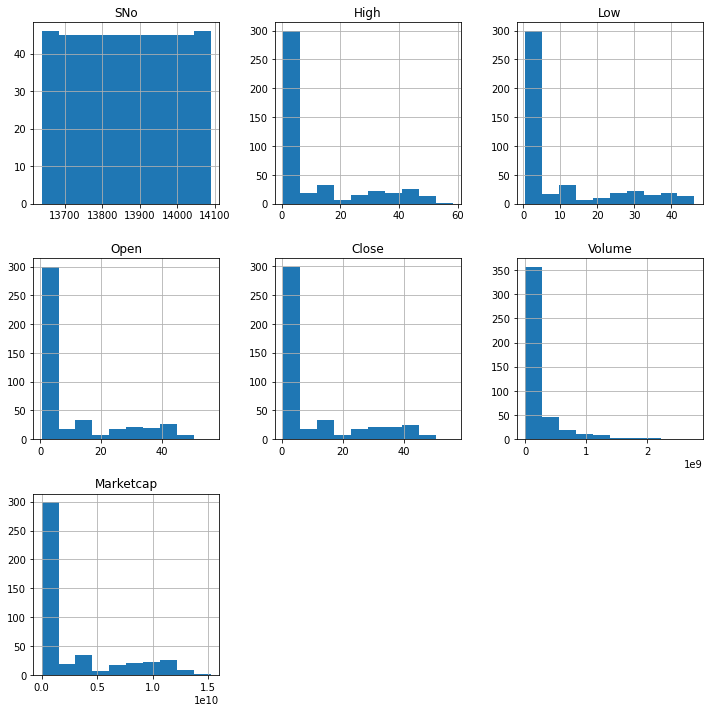

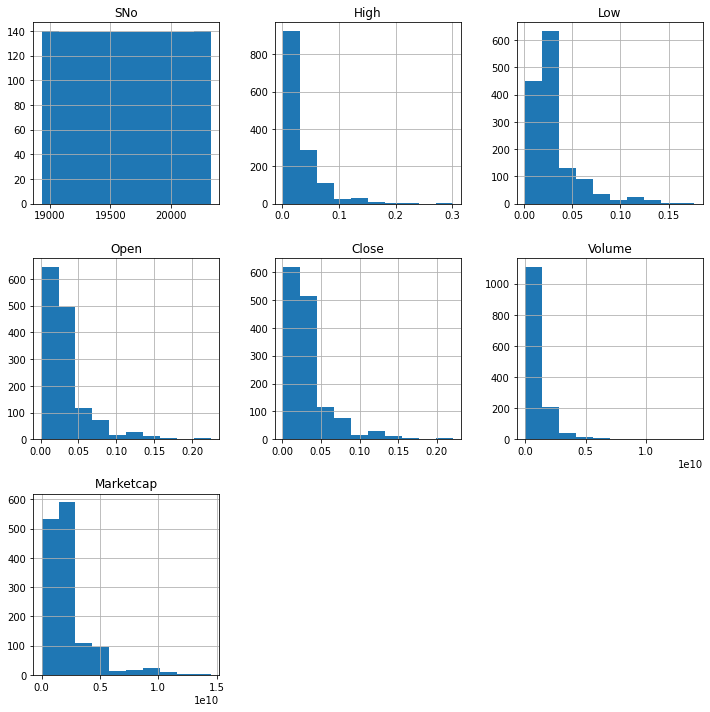

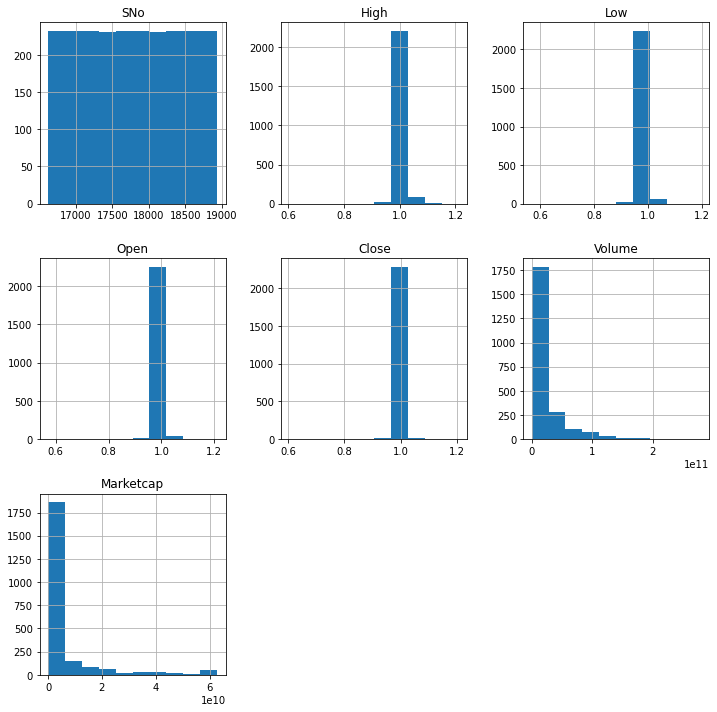

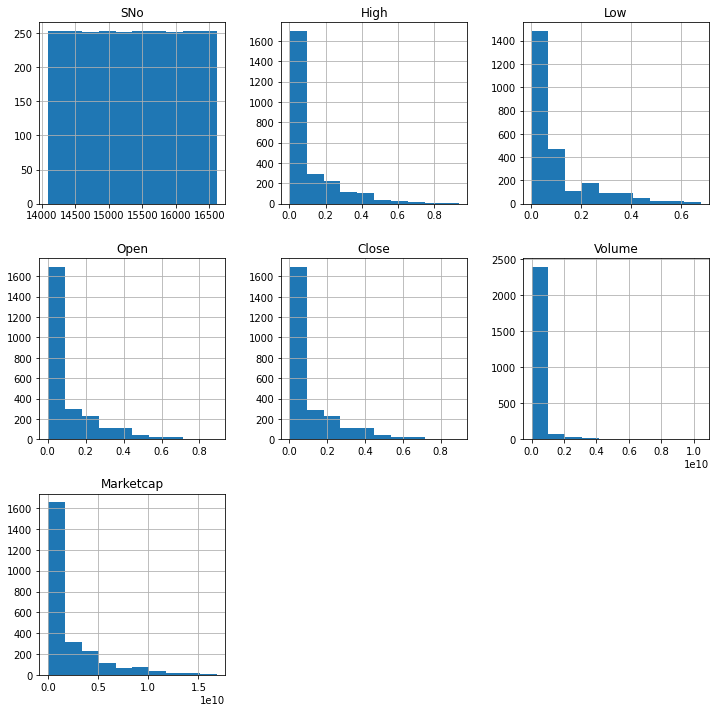

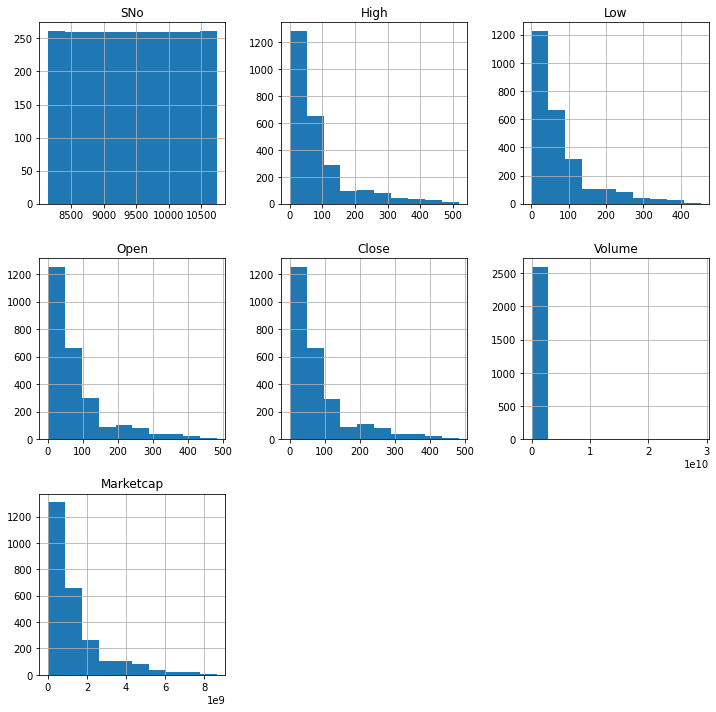

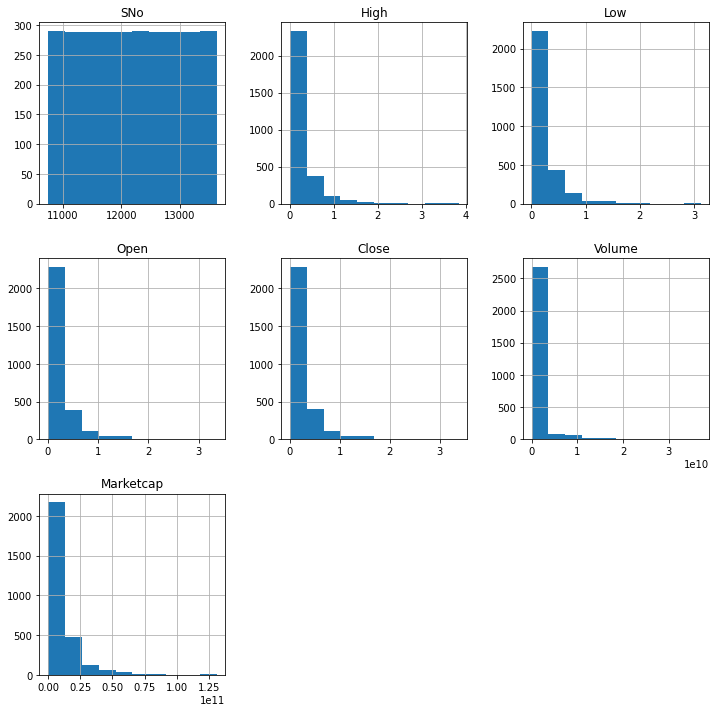

In [76]:
data.groupby("Symbol").hist(figsize=(12, 12));

array([[<AxesSubplot:title={'center':'Volume'}>]], dtype=object)

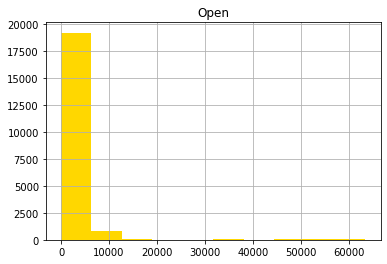

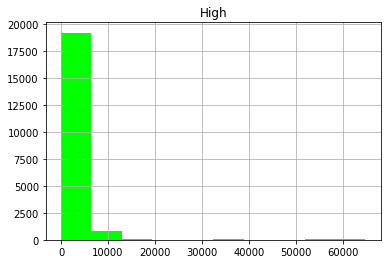

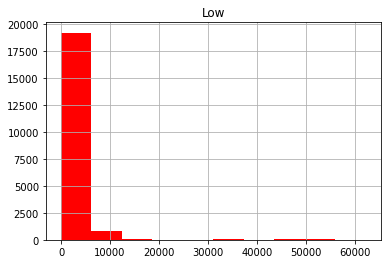

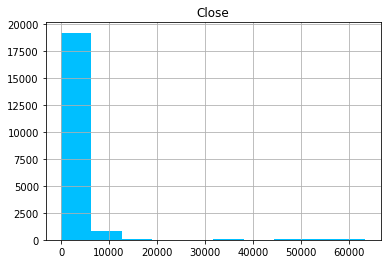

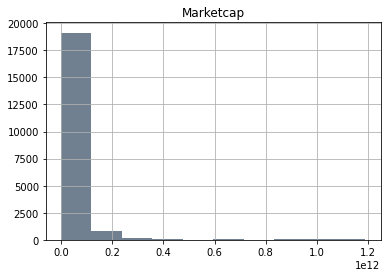

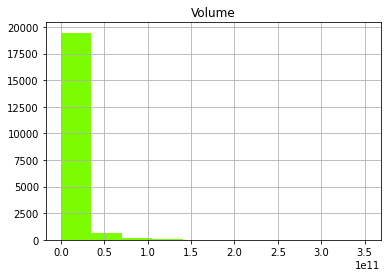

In [78]:
data.hist(column="Open", color="gold")
data.hist(column="High", color="lime")
data.hist(column="Low", color="red")
data.hist(column="Close", color="deepskyblue")
data.hist(column="Marketcap", color="slategrey")
data.hist(column="Volume", color="lawngreen")

4) Cluster map:

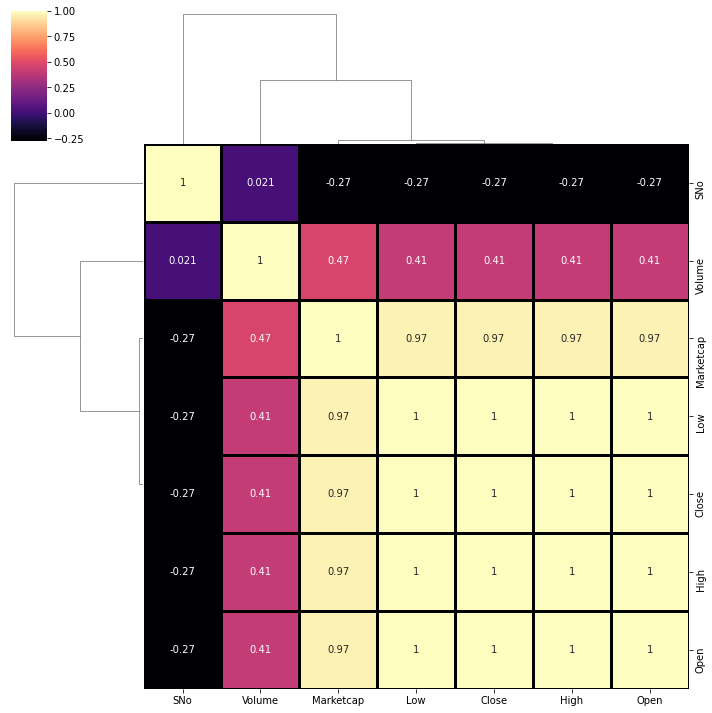

In [84]:
sns.clustermap(corr, cmap="magma", annot=True, linecolor="black", linewidth=3)

5) Pairplot

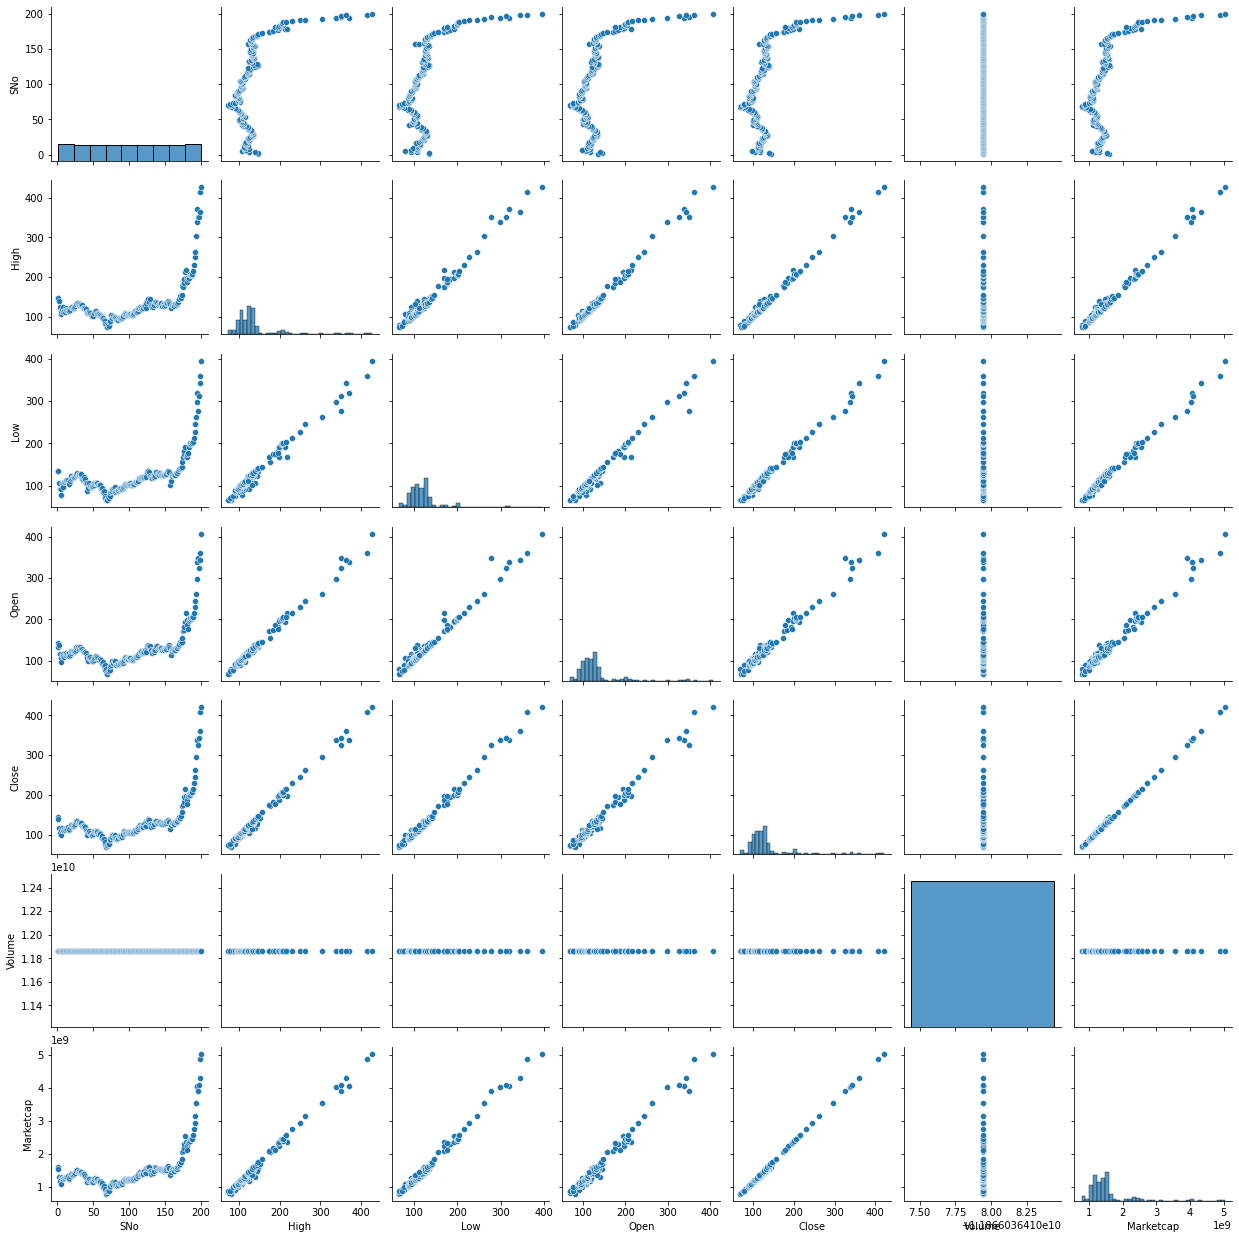

In [87]:
sns.pairplot(data=data.iloc[:200,:])

6)Line plot

<AxesSubplot:ylabel='Volume'>

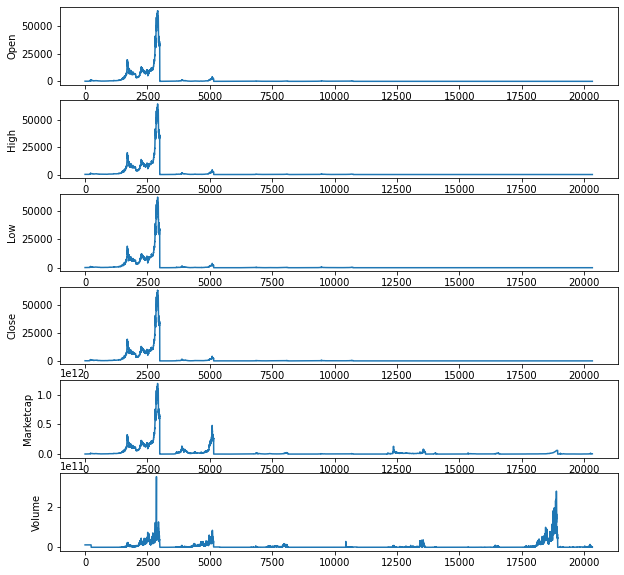

In [88]:
plt.figure(figsize=(10,10))

plt.subplot(6,1,1)
sns.lineplot(data=data.xs(key="Open", axis=1))

plt.subplot(6,1,2)
sns.lineplot(data=data.xs(key="High", axis=1))

plt.subplot(6,1,3)
sns.lineplot(data=data.xs(key="Low", axis=1))

plt.subplot(6,1,4)
sns.lineplot(data=data.xs(key="Close", axis=1))

plt.subplot(6,1,5)
sns.lineplot(data=data.xs(key="Marketcap", axis=1))

plt.subplot(6,1,6)
sns.lineplot(data=data.xs(key="Volume", axis=1))